<a href="https://colab.research.google.com/github/pragneshbarik/AI-ML/blob/main/Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference for Common Machine Learning Algorithms and Data Visualization Techniques.
---

> **Author: Pragnesh Barik**


### Contents
1. **Supervised Learning**
      1. Linear Regression
      2. Logistic Regression
      3. Decision Trees
      4. Neural Networks
      5. Support Vector Machines    
2. **Unsupervised Learning**
    1. K-Means
    2. Principal Component Analysis
    3. Anomaly Detection



**Sources**
* [ML MOOC NPTEL](https://github.com/Santara/ML-MOOC-NPTEL)
* [Machine Learning Course by Stanford](https://www.holehouse.org/mlclass/)


In [28]:
import numpy as np
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## **1. Linear Regression**



### **Theory** 

1. Hypothesis Function
$$h_\theta (x) = \theta_0 + \theta_1 x_1+ \theta_2 x_2\; ... + \:\theta_n x_n$$

2. Cost Function
$$J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^i)-y^i)^2$$

3. Gradient Descent

$$\theta_j := \theta_j - α\frac{∂}{∂\theta_j}J(\theta_0, \theta_1, ... \theta_n)$$
$$\frac{∂}{∂θ_j}J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i).x_j^i$$



### **Prepare Data**
To train a linear model according to the following function.

$$ y = \frac{x}{2}+sin(x)+\epsilon $$ 

$ϵ$ : Gaussian Noise $\in$ $(0,1)$



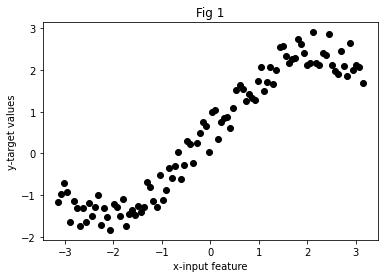

In [ ]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color = 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title("Fig 1")
plt.show()

### Split the dataset into training, validation and test sets

In [ ]:
random_indices = np.random.permutation(number_of_samples)
#Training Set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation Set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test Set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

### **Training the Model**


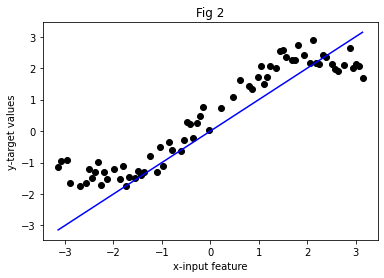

In [ ]:
model = linear_model.LinearRegression()

x_matrix = np.array(x_train.reshape(len(x_train), 1))
y_matrix = np.array(x_train.reshape(len(y_train), 1))

model.fit(x_matrix, y_matrix)

plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape(len(x), 1), model.predict(x.reshape(len(x),1)), color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title("Fig 2")
plt.show()

### **Evaluation of Model**



In [ ]:
val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
print(f"Validation error : {val_error}\nTest Error : {test_error}")

Validation error : 6.773976591771758
Test Error : 2.8400437337526294


## **2. Logisitic Regression**

### **Theory**


1. Hypothesis Function
$$h_\theta (x) = g(\theta^Tx)$$

$$\theta^Tx = \theta_0 + \theta_1 x_1+ \theta_2 x_2\; ... + \:\theta_n x_n$$

$$g(x) = \frac{1}{1+e^{-x}} $$ 

> g(x) is known as sigmoid function. 

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg)

2. Cost Function
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[\;y^i.\log(h_{\theta}(x^i))+(1-y^i).\log(1-h_\theta(x^i)\;]$$

3. Gradient Descent

$$\theta_j := \theta_j - α\frac{∂}{∂\theta_j}J(\theta_0, \theta_1, ... \theta_n)$$

$$\frac{∂}{∂θ_j}J(\theta_0, \theta_1, ... \theta_n)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^i)-y^i).x_j^i$$

### **Prepare Data**

To make a logistic regression model to predict if the handwritten digit is 8 or not. We will use the MNIST database of handwritten digits.

In [58]:
mnist_df = pd.read_csv("train.csv")
display(mnist_df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Visualize Data**

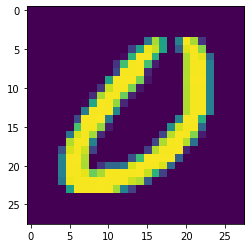

In [57]:
random_row = np.array(mnist_df.iloc[np.random.randint(mnist_df.shape[0])].drop('label'))
plt.imshow(random_row.reshape(28, 28))
plt.show()

In [54]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
19994    0
19995    0
19996    0
19997    0
19998    0
Name: 6, Length: 19999, dtype: int64